## Linear system Solution (np.linalg.solve())

In [19]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import plotvec as plotvec

In [37]:
# Ax = B
# -x + y = 1
# x + y = 1

A = np.array([[1, 1],
              [-1, 1]])
B = np.array([1, 1])

solution = np.linalg.solve(A, B)
print(solution)

[0. 1.]


### plot 해보기

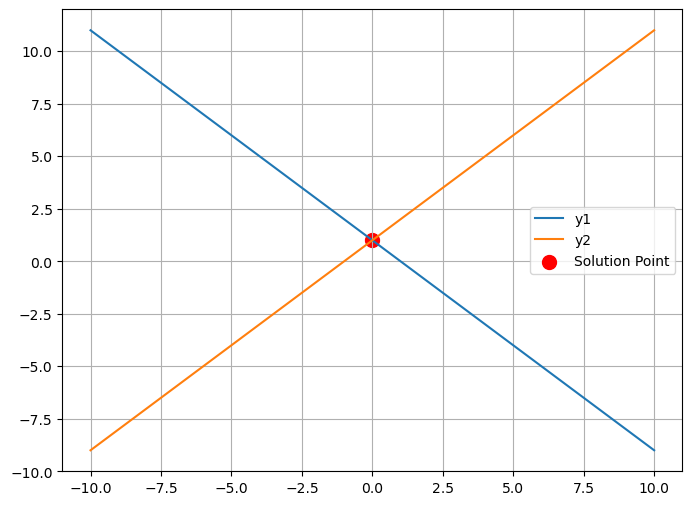

In [38]:
x = np.linspace(-10, 10, 400)
y1 = -x + 1
y2 = x + 1

# -x + y = 1
# x + y = 1
# A = np.array([[1, 1],
#               [-1, 1]])
# B = np.array([1, 1])
# solution = np.linalg.solve(A, B)


fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(x, y1, label = 'y1')
ax.plot(x, y2, label = 'y2')
ax.scatter(solution[0], solution[1], color = 'red', s = 100, label = 'Solution Point')
ax.legend()
ax.grid()
plt.show()

# Row Echelon Form

np.rref()

In [39]:
# x + 3y -2z = 5
# 2y-6z = 4
# 3z = 6

A = np.array([[1, 3, -2],
              [0, 2, -6],
              [0, 0, 3]])
B = np.array([5, 4, 6])

solution = np.linalg.solve(A, B)
print(solution)

[-15.   8.   2.]


In [48]:
# Row Echelon Form
# np.rref()

# 먼저 augmented matrix를 만듭니다.
am = np.hstack((A, B.reshape(-1, 1))) # hstack을 사용하여 A와 B를 합친다. 여기서 B는 열 벡터로 변환 필요.

print(am)

# RREF로 계산
import sympy as sp
sp_matrix = sp.Matrix(am) # numpy 배열을 sympy 행렬로 변환 (numpy 행렬은 rref 메서드를 지원하지 않음 그래서 sympy 사용)

rref_solution = sp_matrix.rref()
print(rref_solution)

# 마지막의 (0,1,2)는 피벗 (leading entry)의 위치를 나타냄.
# 즉, 첫 번째 행의 첫 번째 열, 두 번째 행의 두 번째 열, 세 번째 행의 세 번째 열이 피벗임을 의미.
# 그리고 이 계산의 해는 -15, 8, 2임을 알 수 있음.
# 즉, x = -15, y = 8, z = 2

[[ 1  3 -2  5]
 [ 0  2 -6  4]
 [ 0  0  3  6]]
(Matrix([
[1, 0, 0, -15],
[0, 1, 0,   8],
[0, 0, 1,   2]]), (0, 1, 2))
